In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('./archive (1)/Resume/Resume.csv')

In [32]:
df.head(5)

,ID,Resume_str,Resume_html,Category
0,16852973,hr administrator marketing associate hr admin...,"<div class=""fontsize fontface vmargins hmargin...",19
1,22323967,hr specialist us hr operations summary versat...,"<div class=""fontsize fontface vmargins hmargin...",19
2,33176873,hr director summary over 20 years experience ...,"<div class=""fontsize fontface vmargins hmargin...",19
3,27018550,hr specialist summary dedicated driven and dy...,"<div class=""fontsize fontface vmargins hmargin...",19
4,17812897,hr manager skill highlights hr skills hr depa...,"<div class=""fontsize fontface vmargins hmargin...",19


In [11]:
df.shape

(2484, 4)

(array([], dtype=float64), [])

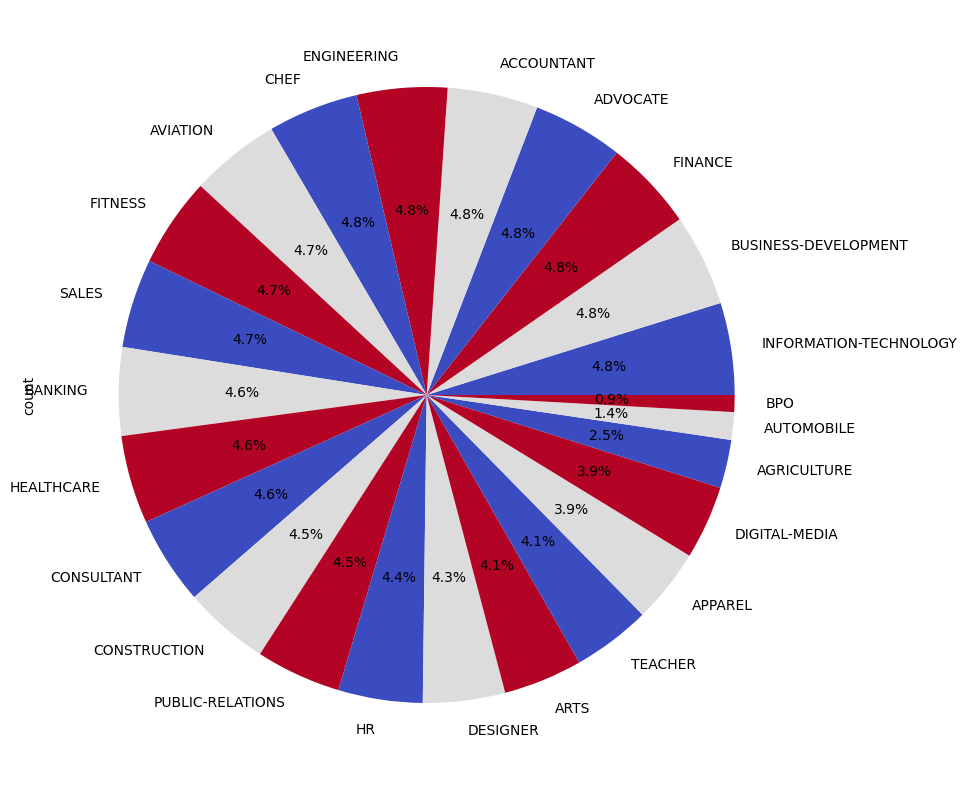

In [12]:
# df.info()
# df.isnull().sum()
plt.figure(figsize=(15,10))
df['Category'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=plt.cm.coolwarm(np.linspace(0,1,3)))
plt.xticks(rotation=90)

In [13]:
df['Category'].value_counts()


Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

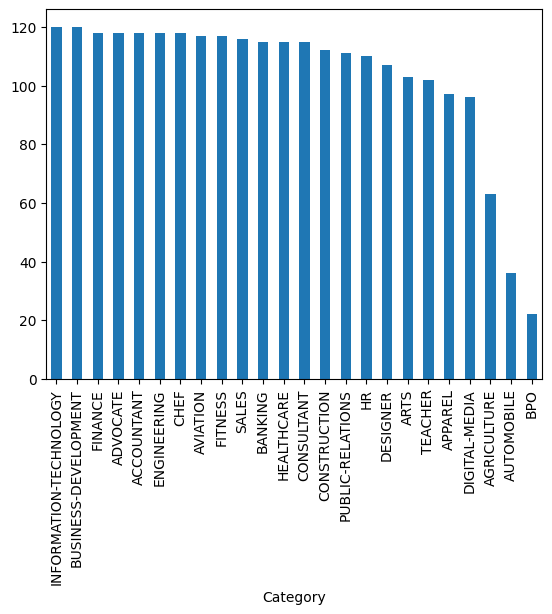

In [14]:
df['Category'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

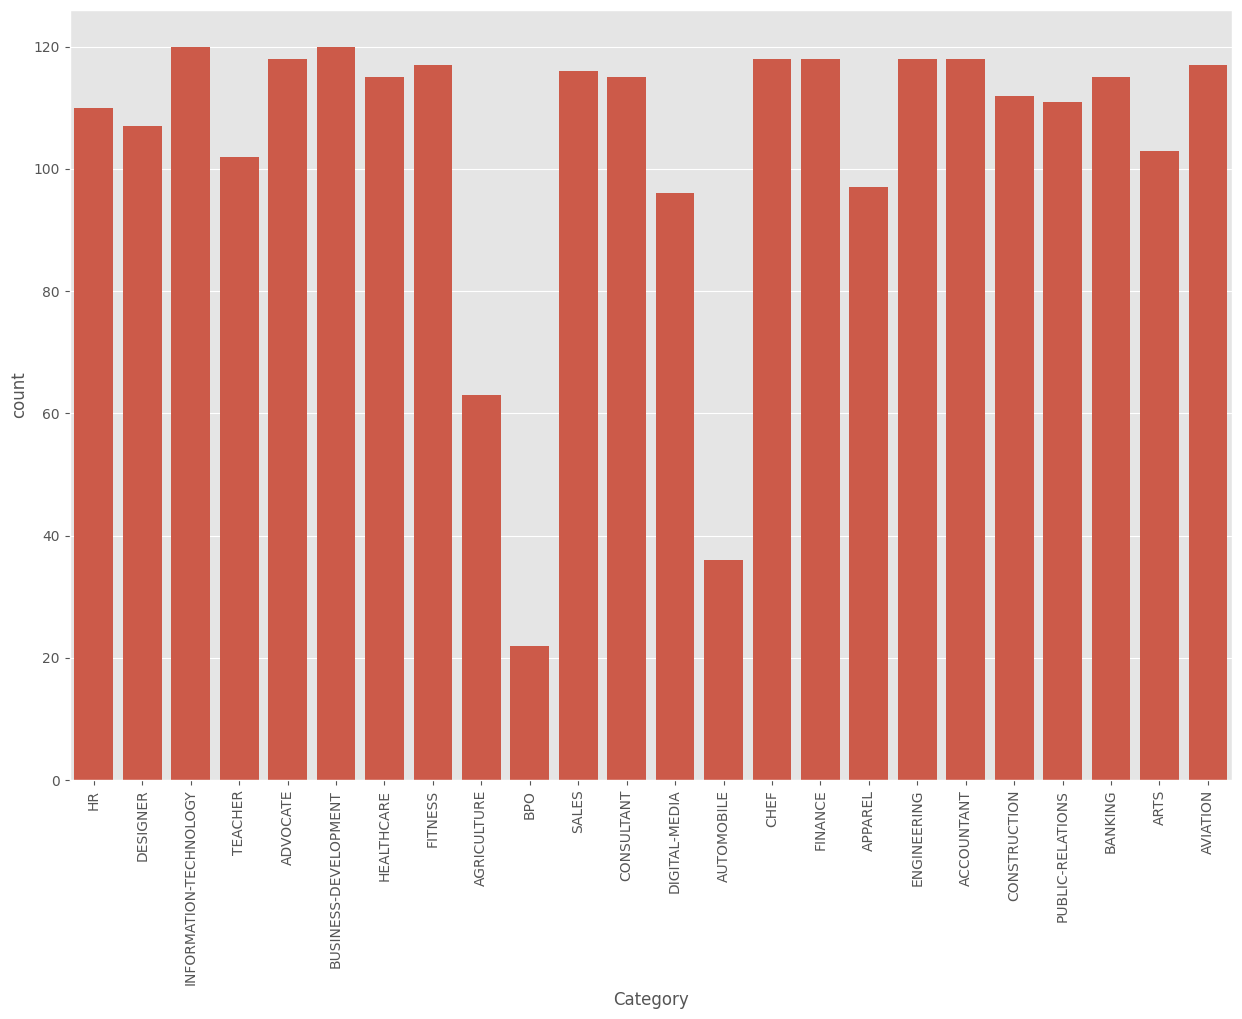

In [15]:
plt.figure(figsize=(15,10))
plt.style.use('ggplot')
sns.countplot(x=df['Category'])
plt.xticks(rotation=90)
plt.show()

In [16]:
import re

def clean(text):

    cleanText = re.sub('http\S+\s', ' ', text)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./\:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    cleanText = re.sub(' \n ', ' ',cleanText)
    cleanText = re.sub(' \\\/// ', ' ',cleanText)
    return cleanText

In [17]:
clean('HI my name is > ali\ /// hassan and @my //website is http://ali')

'HI my name is ali hassan and website is http ali'

In [18]:
df ['Resume_str'] = df['Resume_str'].apply(clean)


In [19]:
df['Resume_str'] = df['Resume_str'].str.lower()
df['Resume_str'][0]

' hr administrator marketing associate hr administrator summary dedicated customer service manager with 15 years of experience in hospitality and customer service management respected builder and leader of customer focused teams strives to instill a shared enthusiastic commitment to customer service highlights focused on customer satisfaction team management marketing savvy conflict resolution techniques training and development skilled multi tasker client relations specialist a omplishments missouri dot supervisor training certification certified by ihg in customer loyalty and marketing by segment hilton worldwide general manager training certification a omplished trainer for cross server hospitality systems such as hilton onq micros opera pms fidelio opera reservation system ors holidex completed courses and seminars in customer service sales strategies inventory control loss prevention safety time management leadership and performance assessment experience hr administrator marketing

In [20]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
lb.fit(df['Category'])
df['Category'] = lb.fit_transform(df['Category'])

In [21]:
df['Category'].value_counts()

Category
20    120
9     120
16    118
1     118
0     118
15    118
10    118
6     117
17    117
22    116
7     115
18    115
12    115
11    112
21    111
19    110
13    107
4     103
23    102
3      97
14     96
2      63
5      36
8      22
Name: count, dtype: int64

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
tdif = TfidfVectorizer(stop_words='english')
knn = OneVsRestClassifier(KNeighborsClassifier())

In [23]:
tdif.fit(df['Resume_str'])
vector = tdif.fit_transform(df['Resume_str'])

In [24]:
from sklearn.model_selection import train_test_split
X = vector
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [25]:
knn.fit(X_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [26]:
pred = knn.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
print(accuracy_score(y_test,pred))

0.5171026156941649


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.59      0.83      0.69        24
           1       0.45      0.38      0.41        24
           2       1.00      0.23      0.38        13
           3       0.44      0.21      0.29        19
           4       0.45      0.24      0.31        21
           5       0.50      0.29      0.36         7
           6       0.89      0.33      0.48        24
           7       0.67      0.35      0.46        23
           8       0.00      0.00      0.00         4
           9       0.28      0.67      0.40        24
          10       0.89      0.67      0.76        24
          11       0.62      0.68      0.65        22
          12       0.18      0.09      0.12        23
          13       0.78      0.67      0.72        21
          14       0.56      0.47      0.51        19
          15       0.62      0.62      0.62        24
          16       0.67      0.50      0.57        24
          17       0.65    

In [30]:
df['Resume_str'][200]

' freelance graphic designer highlights web print design skills software visual elements image photo layout typography color management image file prep retouching resizing formatting packaging press check software adobe creative suite photoshop in design illustrator acrobat creative cloud tumblr square space word press basic html css microsoft office word excel power point outlook mac os 10 11 experience freelance graphic designer 05 2016 current city state influential graphic designer for a high end jewelry company in new york city where i brought originality curiosity enthusiasm a ountability and grit to the table everyday for nearly four years started my own jewelry company called wyndesigns out of college the brand encouraged women to wear their name proudly gia a redited gemologist professional played an instrumental role in the development of the rollins college women s lacrosse program captain senior year website www lgoodwyn com rollins college portfolio design experience creat

In [37]:
import pickle

# Load the trained classifier
# resume = df['resume_str'][100]

resume2 = 'hr benefits leave coordinator summary 13 years of human resources experience and 27 years of administrative experience working in various settings professional detail oriented excellent time management skills team player open and honest communicator effective at maintaining confidentiality and multi tasker skills proficient in all microsoft applications and hris systems banner peopleadmin personnel management information pmis system and benefits eligibility system bes vrs navigator vnav experience december 2016 to current company name city state hr benefits leave coordinator provide consultation and assistance for all employee benefits assist retirement benefits manager in counseling employees on retirements as well as generate retirement calculations assist retirement benefits manager with retirement trainings promote and coordinate all aspects of the highlander wellness watch program advise faculty staff regarding leave policies and procedures interpret and apply policies procedures and guidelines develop and present leave trainings for employees and supervisors content editor for the hr newsletter and hr website committee analyze and reconcile leave discrepancies process and maintain workers compensation claims short term disability claims and fmla requests coordinate return to work for employees on short term disability fmla and wc maintain osha logs and reporting to include osha 301 and osha 300a reports process employees leave corrections process leave share requests and coordinate payments with payroll calculate leave payouts for separating employees for payment process reports in banner hris to ensure leave policies and procedures are being adhered to and applied in regards to flsa regulations perform leave audits provide programmatic support to employees and supervisors for the on line leave reporting system assist with other hr duties as needed to include job fairs benefits fair etc maintain confidential and sensitive information november 2008 to november 2016 company name city state hr leave coordinator advise faculty staff regarding leave policies and procedures interpret and apply policies procedures and guidelines develop and present leave trainings for employees and supervisors analyze and reconcile leave discrepancies process and maintain workers compensation claims short term disability claims and fmla requests coordinate return to work for employees on short term disability fmla and wc maintain osha logs and reporting to include osha 301 and osha 300a reports process employees leave corrections process leave share requests and coordinate payments with payroll calculate leave payouts for separating employees for payment process reports in banner hris to ensure leave policies and procedures are being adhered to and applied in regards to flsa regulations assist with coordination of commonhealth wellness program perform leave audits provide programmatic support to employees and supervisors for the on line leave reporting system assist with other hr duties as needed to include screening job applicants new hire orientation exit interviews open enrollment for health insurance and flexible spending a ounts job fairs benefits fair etc maintain confidential and sensitive information june 2004 to november 2008 company name city state personnel transaction specialist human resource assistant process new hires transfers promotions into banner and pmis systems perform audits for payroll processing process short term disability claims and fmla requests process leave share requests coordinate docks with payroll perform other duties and tasks as needed maintain confidential and sensitive information august 2002 to june 2004 company name city state communications operator refer patients to appropriate areas for treatment assist patients with questions and concerns via phone or walk ins answer incoming calls on a seven line phone system page doctors in a timely manner update call schedules as changes o ur file overhead all codes in a timely manner maintain patient confidentiality education and training bluefield college city state bachelor of science organizational management and leadership organizational management and leadership new river community college associate of applied science business management business management activities and honors society for human resources management shrm colleges and universities professional association for human resources cupa hr skills benefits consultation content counseling editor hris hr insurance all microsoft navigator newsletter page assist patients payroll payroll processing personnel management phone system policies reporting research phone website '
#resume2 = 'freelance graphic designer highlights web print design skills software visual elements image photo layout typography color management image file prep retouching resizing formatting packaging press check software adobe creative suite photoshop in design illustrator acrobat creative cloud tumblr square space word press basic html css microsoft office word excel power point outlook mac os 10 11 experience freelance graphic designer 05 2016 current city state influential graphic designer for a high end jewelry company in new york city where i brought originality curiosity enthusiasm a ountability and grit to the table everyday for nearly four years started my own jewelry company called wyndesigns out of college the brand encouraged women to wear their name proudly gia a redited gemologist professional played an instrumental role in the development of the rollins college women s lacrosse program captain senior year website www lgoodwyn com rollins college portfolio design experience created an icon logo for evolve space a company that provides open space environments where professionals and organizations can work build and pursue their visions and missions in a modern collaborative space working directly with the founder i su essfully brought his vision to life providing him with a multi functional icon fit for different web and print scenarios graphic designer assistant 04 2012 01 2016 company name city state lead graphic designer for the company s madison avenue jewelry boutique owned by new york city philanthropist ann ziff produced all advertisements exhibition invitations and marketing materials executing multiple simultaneously under demanding deadlines ran and oversaw the production process for all of the print web projects listed above executing multiple jobs simultaneously under demanding deadlines worked individually as well as collaboratively with the boutique manager offsite art directors producers photographers and printers presented all assets to the boutique owner in a clear and professional manner organized photo shoots prepared pieces and their respective set ups prior to shoot directed the photographers on product placement layout during each shoot updated and maintained the boutique s website and social media outlets instagram facebook twitter yext as event coordinator i managed logistics with offsite organizations cohosting each event coordinated caterer decorations and handled rsvp lists ran all jewelry production fabrication and oversaw the shipping of raw materials and repairs for tamsen z frequently communicated and assisted with boutique cliental directly conducted and directed store inventory updated jewelry database gemini handled all gift purchases and distribution for family friends clients and members of several philanthropic boards which included the metropolitan opera lincoln center and the metropolitan museum of art assisted with personal correspondence edited met opera acknowledgement letters written on ann s behalf and communicated these revisions to their development office mail and phone management scheduling travel arrangements all of which required excellent verbal and communication skills owner designer wyndesigns october 2011 designed and sold bespoke key chains for the line which i created and managed sold work at amethyst a jewelry boutique in bethesda maryland donated pieces to charity auctions such as the children s hospital holiday gala in washington d c experienced with sketching hand sawing welding soldering annealing forging bezel setting sanding and polishing 11 2011 03 2012 city state handled custom client orders worked with customers assisted with trunk shows updated the website created beaded jewelry for boutique education 2011 bachelors degree rollins college studio art city state gpa gpa 3 13 national society of collegiate scholars and phi eta sigma freshman year captain of the women s lacrosse team education chairman of kappa kappa gamma studio art gpa 3 13 national society of collegiate scholars and phi eta sigma freshman year captain of the women s lacrosse team education chairman of kappa kappa gamma 2013 gemological institute of america completed courses in jewelry essentials and colored stone essentials diamond essentials 92nd y new york city may 2010 university of edinburgh college of art city scotland completed courses in metal sculpture and wire jewelry summer program 2009 rhode island school of design city state completed introduction to metal jewelry course summer program skills adobe creative suite acrobat photo photoshop advertisements art avenue c color com communication skills css client clients database functional graphic designer basic html illustrator image inventory layout letters logistics logo mac os marketing materials materials excel mail microsoft office office outlook power point word packaging press print design printers repairs scheduling sculpture shipping sketching soldering phone travel arrangements typography vision website welding written '

# Clean the input resume
cleaned_resume = clean(resume2)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tdif.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = knn.predict(input_features)[0]

# Map category ID to category name
category_mapping = {19: 'HR', 13: 'DESIGNER', 20: 'INFORMATION-TECHNOLOGY', 23: 'TEACHER', 1: 'ADVOCATE', 9: 'BUSINESS-DEVELOPMENT', 18: 'HEALTHCARE', 17: 'FITNESS', 2: 'AGRICULTURE', 8: 'BPO', 22: 'SALES', 12: 'CONSULTANT', 14: 'DIGITAL-MEDIA', 5: 'AUTOMOBILE', 10: 'CHEF', 16: 'FINANCE', 3: 'APPAREL', 15: 'ENGINEERING', 0: 'ACCOUNTANT', 11: 'CONSTRUCTION', 21: 'PUBLIC-RELATIONS', 7: 'BANKING', 4: 'ARTS', 6: 'AVIATION'}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: HR
19
